<a href="https://www.kaggle.com/code/rahulkotecha/fire-classification?scriptVersionId=94019877" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 1.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel('../input/acoustic-extinguisher-fire-dataset/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [5]:
df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

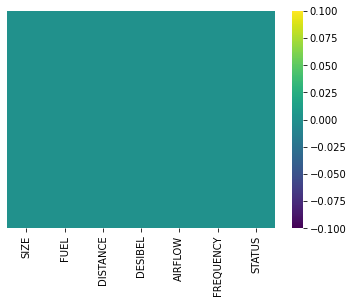

In [6]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [7]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [8]:
df.describe(include=["object"])

,FUEL
count,17442
unique,4
top,gasoline
freq,5130


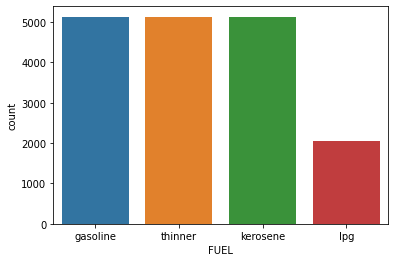

In [9]:
sns.countplot(df["FUEL"])
plt.show()

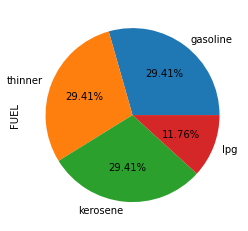

In [10]:
df["FUEL"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

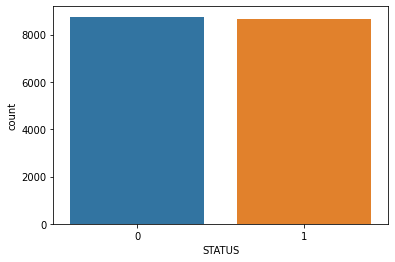

In [11]:
sns.countplot(df["STATUS"])
plt.show()

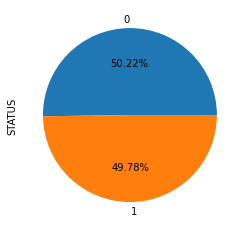

In [12]:
df["STATUS"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
oe=OrdinalEncoder()
df["FUEL"]=oe.fit_transform(df[["FUEL"]])

In [15]:
oe.categories_

[array(['gasoline', 'kerosene', 'lpg', 'thinner'], dtype=object)]

In [16]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0.0,10,96,0.0,75,0
1,1,0.0,10,96,0.0,72,1
2,1,0.0,10,96,2.6,70,1
3,1,0.0,10,96,3.2,68,1
4,1,0.0,10,109,4.5,67,1


In [17]:
from scipy.stats import skew

SIZE
Skewness: 0.2786998636581806


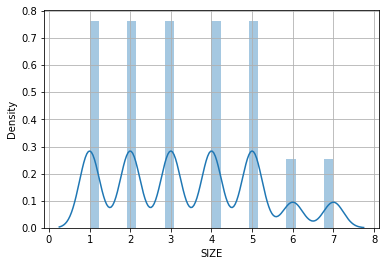

FUEL
Skewness: 0.20959140221588837


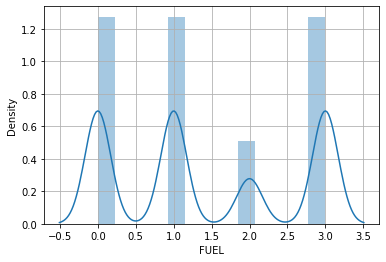

DISTANCE
Skewness: 0.0


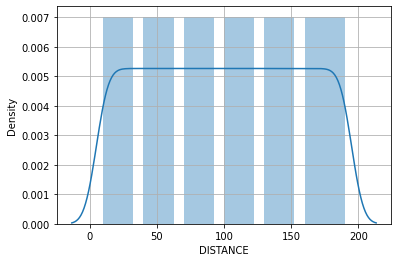

DESIBEL
Skewness: -0.17903195807888958


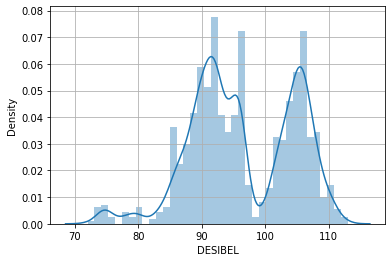

AIRFLOW
Skewness: 0.24434745944124117


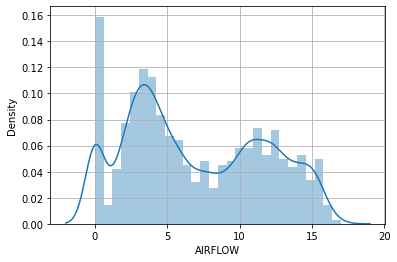

FREQUENCY
Skewness: 0.4348548916349596


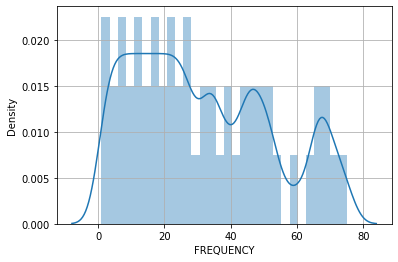

STATUS
Skewness: 0.008714679678955612


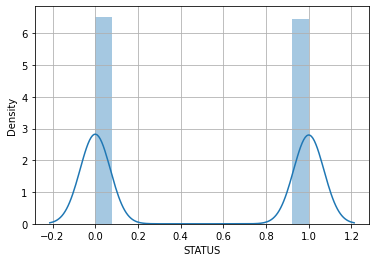

In [18]:
for col in df:
    print(col)
    print(f"Skewness: {skew(df[col])}")
    
    plt.figure()
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()

In [19]:
df.corr()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000e+00,1.161420e-01,-2.437871e-15,-6.125585e-15,1.677898e-16,9.978281e-17,-0.096947
FUEL,1.161420e-01,1.000000e+00,-5.956652e-16,-1.383383e-14,-8.832434e-16,-1.081887e-15,-0.019384
DISTANCE,-2.437871e-15,-5.956652e-16,1.000000e+00,-2.385897e-01,-7.074906e-01,-2.452947e-17,-0.644051
DESIBEL,-6.125585e-15,-1.383383e-14,-2.385897e-01,1.000000e+00,3.769153e-01,5.617409e-01,0.203970
AIRFLOW,1.677898e-16,-8.832434e-16,-7.074906e-01,3.769153e-01,1.000000e+00,-2.120462e-01,0.760628
FREQUENCY,9.978281e-17,-1.081887e-15,-2.452947e-17,5.617409e-01,-2.120462e-01,1.000000e+00,-0.244203
STATUS,-9.694718e-02,-1.938442e-02,-6.440506e-01,2.039698e-01,7.606279e-01,-2.442030e-01,1.000000


In [20]:
df.corr()["STATUS"].sort_values()

DISTANCE    -0.644051
FREQUENCY   -0.244203
SIZE        -0.096947
FUEL        -0.019384
DESIBEL      0.203970
AIRFLOW      0.760628
STATUS       1.000000
Name: STATUS, dtype: float64

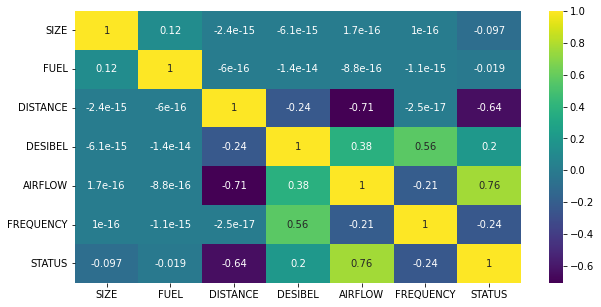

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

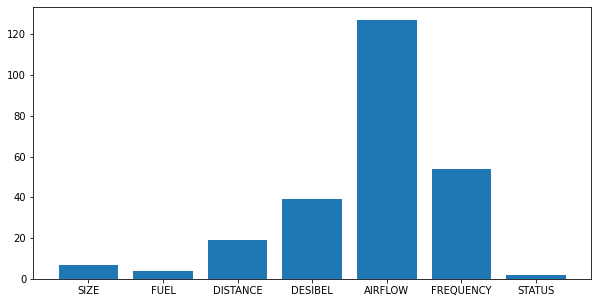

In [22]:
plt.figure(figsize=(10,5))
plt.bar(df.columns,df.nunique())
plt.show()

In [23]:
df.columns

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

In [24]:
x=df.iloc[ : , :-1]
x.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0.0,10,96,0.0,75
1,1,0.0,10,96,0.0,72
2,1,0.0,10,96,2.6,70
3,1,0.0,10,96,3.2,68
4,1,0.0,10,109,4.5,67


In [25]:
y=df.iloc[ : ,-1]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: STATUS, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [31]:
accuracy_score(ytest,ypred)

0.9598700554175426

In [32]:
confusion_matrix(ytest,ypred)

array([[2553,  111],
       [  99, 2470]])

#### Hyper-Parameter Tuning

In [33]:
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

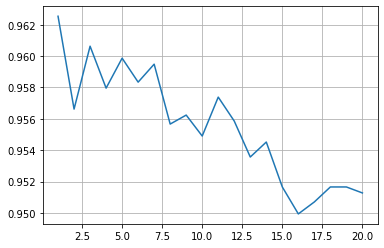

In [34]:
plt.plot(range(1,21),accuracy)
plt.grid(True)
plt.show()

In [35]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [36]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [37]:
accuracy_score(ytest,ypred)

0.9606344353143512

In [38]:
confusion_matrix(ytest,ypred)

array([[2549,  115],
       [  91, 2478]])

#### Cross Validation Score

In [39]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.91917455 0.88449412 0.91284404 0.90338303 0.83400229]
CVS Mean: 0.8907796061540727
CVS Standard Deviation: 0.03070872379372517


#### Bagging

In [40]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [41]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [42]:
accuracy_score(ytest,ypred)

0.9631186699789795

In [43]:
confusion_matrix(ytest,ypred)

array([[2564,  100],
       [  93, 2476]])

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [45]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2664
           1       0.88      0.86      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.87      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [46]:
accuracy_score(ytest,ypred)

0.8752149818459775

In [47]:
confusion_matrix(ytest,ypred)

array([[2369,  295],
       [ 358, 2211]])

#### Hyper-Parameter Tuning

In [48]:
params={
    "C": np.logspace(-3,3,7),
    "solver": ["liblinear","lbfgs","sag","saga","newton-cg"],
    "penalty": ["l1","l2","elasticnet"]
}

In [49]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.876 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.866 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.866 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.869 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.001, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.001, pena

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             verbose=3)

In [50]:
grid.best_score_

0.875911109053264

In [51]:
grid.best_params_

{'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [52]:
grid.best_estimator_

LogisticRegression(C=100.0, penalty='l1', solver='liblinear')

In [53]:
logreg=grid.best_estimator_
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [54]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2664
           1       0.88      0.86      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.87      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [55]:
accuracy_score(ytest,ypred)

0.8752149818459775

In [56]:
confusion_matrix(ytest,ypred)

array([[2369,  295],
       [ 358, 2211]])

#### Cross Validation Score

In [57]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.88793351 0.84952709 0.88274083 0.89048165 0.8122133 ]
CVS Mean: 0.864579274048714
CVS Standard Deviation: 0.030049820524701638


#### Bagging

In [58]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [59]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2664
           1       0.88      0.86      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.88      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [60]:
accuracy_score(ytest,ypred)

0.8761704567169883

In [61]:
confusion_matrix(ytest,ypred)

array([[2375,  289],
       [ 359, 2210]])

# Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [63]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2664
           1       0.89      0.84      0.86      2569

    accuracy                           0.87      5233
   macro avg       0.87      0.87      0.87      5233
weighted avg       0.87      0.87      0.87      5233



In [64]:
accuracy_score(ytest,ypred)

0.8671889929294859

In [65]:
confusion_matrix(ytest,ypred)

array([[2391,  273],
       [ 422, 2147]])

#### Cross Validation Score

In [66]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(nb,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8801949  0.84809401 0.88159404 0.88102064 0.86066514]
CVS Mean: 0.8703137449020645
CVS Standard Deviation: 0.013611260612672553


#### Bagging

In [67]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(nb)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [68]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2664
           1       0.89      0.84      0.86      2569

    accuracy                           0.87      5233
   macro avg       0.87      0.87      0.87      5233
weighted avg       0.87      0.87      0.87      5233



In [69]:
accuracy_score(ytest,ypred)

0.8677622778520925

In [70]:
confusion_matrix(ytest,ypred)

array([[2394,  270],
       [ 422, 2147]])

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [72]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [73]:
accuracy_score(ytest,ypred)

0.9619721001337664

In [74]:
confusion_matrix(ytest,ypred)

array([[2559,  105],
       [  94, 2475]])

#### Hyper-Parameter Tuning

In [75]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="gini",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9631186699789795 15


In [76]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9612077202369578 1


In [77]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9671316644372253 13


In [78]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9657939996178101 1


In [79]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=23)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [80]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2664
           1       0.96      0.97      0.97      2569

    accuracy                           0.97      5233
   macro avg       0.97      0.97      0.97      5233
weighted avg       0.97      0.97      0.97      5233



In [81]:
accuracy_score(ytest,ypred)

0.9659850945920122

In [82]:
confusion_matrix(ytest,ypred)

array([[2566,   98],
       [  80, 2489]])

#### Cross Validation Score

In [83]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.82831757 0.82344511 0.87672018 0.90051606 0.84059633]
CVS Mean: 0.85391905030489
CVS Standard Deviation: 0.02984213147631024


#### Bagging

In [84]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [85]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2664
           1       0.97      0.97      0.97      2569

    accuracy                           0.97      5233
   macro avg       0.97      0.97      0.97      5233
weighted avg       0.97      0.97      0.97      5233



In [86]:
accuracy_score(ytest,ypred)

0.9682782342824384

In [87]:
confusion_matrix(ytest,ypred)

array([[2581,   83],
       [  83, 2486]])

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [89]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [90]:
accuracy_score(ytest,ypred)

0.9606344353143512

In [91]:
confusion_matrix(ytest,ypred)

array([[2563,  101],
       [ 105, 2464]])

#### Cross Validation Score

In [92]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.9125824  0.85267985 0.90911697 0.93119266 0.8440367 ]
CVS Mean: 0.8899217166139453
CVS Standard Deviation: 0.03486444284750225


# Support Vector Classifier

In [93]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [94]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2664
           1       0.94      0.93      0.93      2569

    accuracy                           0.93      5233
   macro avg       0.93      0.93      0.93      5233
weighted avg       0.93      0.93      0.93      5233



In [95]:
accuracy_score(ytest,ypred)

0.9348366137970572

In [96]:
confusion_matrix(ytest,ypred)

array([[2500,  164],
       [ 177, 2392]])

In [97]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [98]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2664
           1       0.89      0.85      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.88      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [99]:
accuracy_score(ytest,ypred)

0.875788266768584

In [100]:
confusion_matrix(ytest,ypred)

array([[2391,  273],
       [ 377, 2192]])

#### Hyper-Parameter Tuning

In [101]:
params={
    "C": np.logspace(-3,3,7),
    "kernel": ["rbf"]
}

In [102]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(svc,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...............C=0.001, kernel=rbf;, score=0.885 total time=   5.9s
[CV 2/5] END ...............C=0.001, kernel=rbf;, score=0.876 total time=   5.9s
[CV 3/5] END ...............C=0.001, kernel=rbf;, score=0.873 total time=   5.9s
[CV 4/5] END ...............C=0.001, kernel=rbf;, score=0.869 total time=   5.9s
[CV 5/5] END ...............C=0.001, kernel=rbf;, score=0.879 total time=   5.8s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.898 total time=   2.7s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.890 total time=   2.7s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.882 total time=   2.7s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.881 total time=   2.6s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.888 total time=   2.7s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.920 total time=   1.6s
[CV 2/5] END .................C=0.1, kernel=rbf;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['rbf']},
             verbose=3)

In [103]:
grid.best_score_

0.9656812821909094

In [104]:
grid.best_params_

{'C': 1000.0, 'kernel': 'rbf'}

In [105]:
grid.best_estimator_

SVC(C=1000.0)

In [106]:
svc=grid.best_estimator_
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [107]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2664
           1       0.96      0.97      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [108]:
accuracy_score(ytest,ypred)

0.9638830498757882

In [109]:
confusion_matrix(ytest,ypred)

array([[2560,  104],
       [  85, 2484]])

#### Cross Validation Score

In [110]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.90455718 0.89051304 0.91026376 0.91771789 0.83486239]
CVS Mean: 0.8915828514781712
CVS Standard Deviation: 0.02972778363873417


#### Bagging

In [111]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(svc)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [112]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [113]:
accuracy_score(ytest,ypred)

0.9621631951079687

In [114]:
confusion_matrix(ytest,ypred)

array([[2572,   92],
       [ 106, 2463]])

# Voting Classifier

In [115]:
models=[]
models.append(("KNeighborsClassifier", KNeighborsClassifier()))
models.append(("LogisticRegression", LogisticRegression()))
models.append(("Naive Bayes", GaussianNB()))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
models.append(("SVC", SVC()))

In [116]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=models)
vt.fit(xtrain,ytrain)
ypred=vt.predict(xtest)

In [117]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2664
           1       0.96      0.93      0.95      2569

    accuracy                           0.95      5233
   macro avg       0.95      0.95      0.95      5233
weighted avg       0.95      0.95      0.95      5233



In [118]:
confusion_matrix(ytest,ypred)

array([[2572,   92],
       [ 183, 2386]])

In [119]:
accuracy_score(ytest,ypred)

0.9474488820944009

# Boosting

###### AdaBoostClassifier

In [120]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred = abc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2664
           1       0.93      0.92      0.92      2569

    accuracy                           0.92      5233
   macro avg       0.92      0.92      0.92      5233
weighted avg       0.92      0.92      0.92      5233



In [121]:
accuracy_score(ytest,ypred)

0.9229887253965221

In [122]:
confusion_matrix(ytest,ypred)

array([[2474,  190],
       [ 213, 2356]])

###### Gradient Boosting

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred = gb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2664
           1       0.95      0.94      0.94      2569

    accuracy                           0.94      5233
   macro avg       0.94      0.94      0.94      5233
weighted avg       0.94      0.94      0.94      5233



In [124]:
accuracy_score(ytest,ypred)

0.9428626027135486

In [125]:
confusion_matrix(ytest,ypred)

array([[2530,  134],
       [ 165, 2404]])

###### XG Boosting

In [126]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(xtrain, ytrain)
ypred = xg.predict(xtest)
print(classification_report(ytest, ypred))

[04:57:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2664
           1       0.98      0.98      0.98      2569

    accuracy                           0.98      5233
   macro avg       0.98      0.98      0.98      5233
weighted avg       0.98      0.98      0.98      5233



In [127]:
accuracy_score(ytest,ypred)

0.9772596980699407

In [128]:
confusion_matrix(ytest,ypred)

array([[2606,   58],
       [  61, 2508]])

# Deep Learning- Artificial Neural Network

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [130]:
ann=Sequential()

ann.add(Dense(units=6,activation="relu"))
ann.add(Dense(units=3,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

ann.fit(xtrain,ytrain,epochs=1000,validation_data=(xtest,ytest),batch_size=200)

2022-04-26 04:57:51.267343: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-26 04:57:51.391566: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
62/62 [==============================] - 1s 7ms/step - loss: 0.6471 - accuracy: 0.7063 - val_loss: 0.6112 - val_accuracy: 0.7751
Epoch 2/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.5803 - accuracy: 0.8133 - val_loss: 0.5472 - val_accuracy: 0.8349
Epoch 3/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.8604 - val_loss: 0.4938 - val_accuracy: 0.8701
Epoch 4/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.8775 - val_loss: 0.4576 - val_accuracy: 0.8779
Epoch 5/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.4447 - accuracy: 0.8799 - val_loss: 0.4340 - val_accuracy: 0.8787
Epoch 6/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.8829 - val_loss: 0.4170 - val_accuracy: 0.8796
Epoch 7/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8855 - val_loss: 0.4033 - val_accuracy: 0.8813
Epoch 

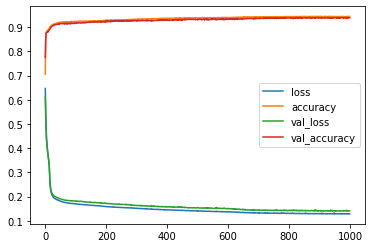

In [131]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [132]:
ypred=ann.predict(xtest)

In [133]:
ypred=ypred>0.5

In [134]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2664
           1       0.94      0.94      0.94      2569

    accuracy                           0.94      5233
   macro avg       0.94      0.94      0.94      5233
weighted avg       0.94      0.94      0.94      5233



In [135]:
accuracy_score(ytest,ypred)

0.9392317982037073

In [136]:
confusion_matrix(ytest,ypred)

array([[2503,  161],
       [ 157, 2412]])

# Summary

###### The Accuracy achieved per model is as follows:

Model name: KNN
    - Initial Accuracy: 95.98%,
    - Accuracy Post Hyper-parameter Tuning: 96.06%,
    - Cross Validation Score: 89.07%,
    - Bagging Accuracy: 96.00%,
    - Best Accuracy Achieved: 96.06%
        
        
Model name: Logistic Regression
    - Initial Accuracy: 87.52%,
    - Accuracy Post Hyper-parameter Tuning: 87.52%,
    - Cross Validation Score: 86.45%,
    - Bagging Accuracy: 87.57%,
    - Best Accuracy Achieved: 87.57%

        
Model name: Naive Bayes
    - Initial Accuracy: 86.72%,
    - Cross Validation Score: 87.03%,
    - Bagging Accuracy: 86.69%,    
    - Best Accuracy Achieved: 86.72%

        
Model name: Decision Tree
    - Initial Accuracy: 96.06%,
    - Accuracy Post Hyper-parameter Tuning: 96.65%,
        Criterion Gini:
            Max Depth best Accuracy- 96.29%,
            Min Samples Leaf best Accuracy- 96.00%,
        Criterion Entropy:
            Max Depth best Accuracy- 96.81%,
            Min Samples Leaf best Accuracy- 96.69%,
    - Cross Validation Score: 85.46%,
    - Bagging Accuracy: 96.52%,
    - Best Accuracy Achieved: 96.65%

        
Model name: Random Forest
    - Initial Accuracy: 96.25%,
    - Cross Validation Score: 88.89%,
    - Best Accuracy Achieved: 96.25%
        

Model name: Support Vector Classifier
    - Initial Accuracy: 
        Kernel "rbf"- 93.48%,
        Kernel "linear"- 87.57%,
    - Accuracy Post Hyper-parameter Tuning: 96.38%,
    - Cross Validation Score: 89.15%,
    - Bagging Accuracy: 96.42%,
    - Best Accuracy Achieved: 96.42%
        
        
Voting Classifier Accuracy: 94.68%


Boosting:
    - Ada Boosting: 92.29%,
    - Gradient Boosting: 94.28%,
    - XG Boosting: 93.96%,
    
    
Deep Learning- Artificial Neural Network
    - Best Accuracy: 93.00%